# 01. Знакомство с `torch.Tensor`

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [1]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [2]:
tens = torch.zeros((8, 8))
tens[[1, -2]] = torch.ones(8)
tens[[0, -1]] = torch.tensor([4., 3., 2., 6., 5., 2., 3., 4.])
tens[0] *= -1
tens

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [3]:
tens = torch.arange(2, 20 + 1, 2) * torch.arange(3, 22, 2)
tens

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [4]:
x = 11
y = 7

In [5]:
tens = torch.arange(1, x + 1) + torch.arange(0, (y-1) * 10 + 1  , 10).reshape(-1, 1)
tens

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
        [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
        [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51],
        [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
        [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [6]:
texture = torch.tensor([[0, 1], [2, 3]])
rows, cols = texture.shape

In [7]:
def func(n, m):
    nd = n // rows
    md = m // cols
    r = torch.zeros(n, m)

    drows = nd * rows
    dcols = md * cols
    n_to_add = n % rows
    m_to_add = m % cols

    r[:drows, :dcols] = texture.repeat((nd, md))
    r[drows:, :dcols] = texture[:n_to_add].repeat((1, md))
    r[:drows, dcols:] = texture[:, :m_to_add].repeat((nd, 1))
    r[drows:, dcols:] = texture[:n_to_add, :m_to_add]
    return r

In [8]:
func(4, 5)

tensor([[0., 1., 0., 1., 0.],
        [2., 3., 2., 3., 2.],
        [0., 1., 0., 1., 0.],
        [2., 3., 2., 3., 2.]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

In [9]:
sampler = torch.distributions.Uniform(0, 20)

In [10]:
x = sampler.sample((4, 7))
minimum, maximum = x.aminmax()
tens = (x - minimum) / (maximum - minimum)
tens

tensor([[0.3810, 1.0000, 0.2613, 0.0000, 0.5032, 0.6142, 0.8816],
        [0.8195, 0.8907, 0.0495, 0.0898, 0.1589, 0.9627, 0.8733],
        [0.7897, 0.5219, 0.1880, 0.5054, 0.7431, 0.9405, 0.3756],
        [0.0252, 0.5734, 0.5635, 0.3582, 0.7598, 0.0619, 0.2401]])

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [11]:
n, m = 4, 7

In [12]:
ar1= torch.randint(0, 10, (2, n, m))
ar1

tensor([[[9, 9, 4, 0, 9, 8, 1],
         [6, 7, 7, 4, 4, 2, 3],
         [6, 1, 7, 2, 4, 3, 9],
         [8, 5, 1, 2, 7, 4, 1]],

        [[3, 5, 1, 3, 9, 7, 0],
         [8, 0, 6, 1, 4, 6, 4],
         [8, 8, 0, 5, 5, 5, 7],
         [2, 5, 8, 6, 5, 3, 2]]])

In [13]:
ar2= torch.randint(0, 10, (2, n, m))
ar2

tensor([[[9, 2, 9, 0, 2, 0, 7],
         [8, 7, 1, 4, 3, 7, 8],
         [3, 0, 3, 3, 6, 1, 7],
         [5, 6, 4, 1, 7, 0, 1]],

        [[7, 7, 5, 2, 8, 3, 3],
         [0, 6, 7, 5, 6, 0, 6],
         [9, 0, 5, 2, 5, 5, 4],
         [5, 6, 2, 8, 3, 8, 0]]])

In [14]:
tens = torch.maximum(ar1, ar2)
tens

tensor([[[9, 9, 9, 0, 9, 8, 7],
         [8, 7, 7, 4, 4, 7, 8],
         [6, 1, 7, 3, 6, 3, 9],
         [8, 6, 4, 2, 7, 4, 1]],

        [[7, 7, 5, 3, 9, 7, 3],
         [8, 6, 7, 5, 6, 6, 6],
         [9, 8, 5, 5, 5, 5, 7],
         [5, 6, 8, 8, 5, 8, 2]]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [15]:
tens = torch.randint(0, 101, (20,))
x, y = tens.topk(2)

In [16]:
tens

tensor([66,  2, 45, 64,  7, 68, 67, 80, 97, 14,  5, 51, 48, 25, 25, 99, 15, 20,
        97, 60])

In [17]:
x[1].item()

97

In [18]:
y[1].item()

8

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [19]:
n = 11
m = 7
tens = torch.arange(1, m + 1) + torch.arange(0, (n-1)*10+1  , 10).reshape(-1, 1)
tens

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [20]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
tens = a_2d - b_1d.reshape(-1, 1)
tens

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [21]:
import numpy as np
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
tens = torch.argwhere(a==b).view(-1)
tens

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [22]:
tens = torch.flip(torch.arange(9).view(3,3), dims=(0,1))
tens

tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [23]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
tens = a[(a >= 5) & (a <= 10)]
tens

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [24]:
tens = torch.arange(9).reshape(3,3)
tens

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [25]:
tens[:,[0, 1]] = tens[:,[1, 0]]
tens

tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [26]:
tens = torch.randint(0, 10, (8, 10))
tens

tensor([[9, 1, 9, 5, 5, 5, 3, 8, 8, 4],
        [1, 5, 7, 8, 3, 7, 8, 8, 3, 5],
        [3, 9, 4, 0, 9, 4, 5, 0, 7, 1],
        [8, 4, 8, 4, 9, 4, 5, 2, 4, 8],
        [0, 5, 1, 5, 1, 5, 0, 8, 1, 9],
        [8, 7, 9, 0, 4, 8, 2, 3, 2, 0],
        [7, 4, 1, 0, 4, 0, 9, 0, 4, 1],
        [0, 7, 5, 6, 5, 9, 4, 2, 8, 1]])

In [27]:
mini = tens.sum(dim=1).argmin()
mini.item(), tens[mini]

(6, tensor([7, 4, 1, 0, 4, 0, 9, 0, 4, 1]))

1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [28]:
tens = torch.randint(0, 100, (20,))
tens[tens < 30] = 30
tens[tens > 70] = 70
tens

tensor([55, 46, 47, 60, 50, 70, 38, 30, 35, 31, 30, 54, 30, 36, 70, 30, 30, 36,
        30, 32])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [29]:
ar1 = torch.randint(0, 10, (2, 30, 3))
ar2 = torch.randint(0, 10, (2, 30, 3))
(ar1[ar1 > ar2]).sum().item()

565

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [30]:
x = 20
tens = torch.randint(0, 10, (x,x))
tens

tensor([[9, 3, 8, 8, 9, 4, 8, 6, 3, 7, 1, 2, 0, 7, 9, 2, 4, 7, 7, 9],
        [8, 8, 6, 7, 1, 3, 3, 4, 6, 4, 5, 5, 1, 4, 6, 5, 3, 0, 4, 1],
        [6, 1, 4, 6, 7, 4, 9, 8, 9, 1, 7, 8, 7, 9, 6, 3, 5, 9, 7, 3],
        [1, 3, 8, 3, 5, 5, 1, 1, 8, 1, 8, 1, 0, 8, 4, 7, 5, 7, 9, 9],
        [8, 2, 3, 3, 5, 7, 2, 9, 6, 8, 1, 9, 4, 8, 9, 7, 1, 4, 1, 1],
        [8, 0, 8, 1, 4, 6, 1, 8, 6, 8, 2, 4, 7, 9, 5, 8, 0, 8, 8, 3],
        [8, 1, 6, 7, 6, 3, 3, 7, 0, 6, 4, 6, 7, 1, 7, 0, 5, 6, 7, 8],
        [2, 8, 0, 2, 7, 6, 7, 2, 9, 2, 7, 3, 4, 0, 3, 1, 9, 8, 4, 0],
        [6, 7, 7, 8, 9, 1, 9, 3, 5, 7, 5, 0, 8, 6, 3, 3, 4, 6, 5, 6],
        [7, 9, 2, 7, 6, 3, 7, 0, 0, 5, 3, 4, 3, 4, 9, 8, 9, 7, 1, 3],
        [1, 5, 0, 8, 3, 7, 3, 0, 8, 3, 0, 0, 7, 0, 8, 9, 8, 6, 5, 2],
        [4, 6, 2, 5, 4, 0, 8, 9, 4, 2, 7, 0, 3, 0, 1, 5, 8, 7, 4, 7],
        [5, 7, 4, 6, 3, 9, 1, 6, 6, 8, 6, 5, 7, 3, 8, 9, 3, 8, 9, 2],
        [3, 5, 2, 6, 5, 8, 3, 1, 0, 5, 5, 8, 5, 2, 0, 7, 3, 4, 6, 8],
        [7, 0, 6, 5,

In [31]:
#главная диагональ
y = torch.arange(0, x)
main = tens[y, y]
main

tensor([9, 8, 4, 3, 5, 6, 3, 2, 5, 5, 0, 0, 7, 2, 7, 4, 5, 6, 7, 1])

In [32]:
# диагональ выше основной
other = tens[y[:-1], y[1:]]
other

tensor([3, 6, 6, 5, 7, 1, 7, 9, 7, 3, 0, 3, 3, 0, 1, 8, 4, 7, 2])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [33]:
ar1, ar2 = torch.randint(0, 10, (2, 5, 10))

In [34]:
ar1

tensor([[6, 6, 5, 8, 2, 2, 4, 6, 7, 9],
        [7, 8, 9, 1, 6, 3, 8, 4, 1, 1],
        [5, 9, 8, 6, 8, 6, 4, 0, 3, 6],
        [0, 5, 3, 3, 8, 7, 2, 7, 1, 2],
        [6, 2, 6, 3, 3, 3, 3, 2, 4, 1]])

In [35]:
ar2

tensor([[5, 0, 1, 3, 2, 8, 4, 8, 6, 6],
        [9, 7, 9, 1, 5, 3, 5, 2, 5, 6],
        [4, 3, 3, 9, 9, 5, 9, 0, 8, 7],
        [6, 3, 9, 7, 4, 6, 0, 5, 8, 0],
        [6, 8, 6, 1, 9, 2, 1, 7, 1, 8]])

In [36]:
ar1[ar1==ar2] *= 2
ar1

tensor([[ 6,  6,  5,  8,  4,  2,  8,  6,  7,  9],
        [ 7,  8, 18,  2,  6,  6,  8,  4,  1,  1],
        [ 5,  9,  8,  6,  8,  6,  4,  0,  3,  6],
        [ 0,  5,  3,  3,  8,  7,  2,  7,  1,  2],
        [12,  2, 12,  3,  3,  3,  3,  2,  4,  1]])

1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [37]:
ar1, ar2, ar3 = torch.randint(0, 10, (3, 4, 7))
ar1[(ar1 > ar2) & (ar1 < ar3)] = 0
ar1

tensor([[6, 0, 8, 3, 0, 9, 3],
        [5, 7, 6, 0, 5, 2, 3],
        [1, 1, 5, 3, 8, 9, 7],
        [4, 5, 4, 0, 4, 4, 6]])

1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [38]:
ar1 = torch.randint(0, 20, (20, 5))

In [39]:
columns, num = ar1.max(dim=1)[1].unique(return_counts=True)
columns, num

(tensor([0, 1, 2, 3, 4]), tensor([3, 5, 1, 4, 7]))

In [40]:
tens = columns[num >= 5]
tens

tensor([1, 4])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива.

In [41]:
n, m = 4, 7
ar1 = torch.rand((n, m))
maxi = ar1.argmax()
i, j = maxi // m, maxi % m
ar1[i+1:,j]   = 0
ar1 [i, j+1:] = 0

C:\Users\Ace\AppData\Local\Temp\ipykernel_20148\1816487271.py:4: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  i, j = maxi // m, maxi % m


1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [42]:
tens = torch.tensor([2, 3, 2, 2, 2, 1])
x = tens.max()
ar = torch.eye(x)
ar = ar[tens-1]
ar

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая.

In [43]:
arr = torch.randint(0, 100, (20,))
arr

tensor([ 5, 97, 91, 20, 34, 51, 33, 25, 78, 14, 74, 99, 84,  1, 33, 64, 59, 34,
        19,  9])

In [44]:
x, num = arr.unique(return_counts=True)
freq = num.max()
freq_num = x[num == freq]
indexes = torch.argwhere(torch.isin(arr, freq_num)).reshape(-1)
freq_num, indexes

(tensor([33, 34]), tensor([ 4,  6, 14, 17]))

## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [45]:
n = 1000
x = torch.linspace(0, 10, n)
y = x * x.sin()
((y > 0.5).sum() / n).item()

0.5230000019073486

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [46]:
n = 100
tens = torch.arange(0, n + 1)

In [47]:
i = 2
while i * i < n:
    if tens[i] != 0:
        tens[i+i::i] = 0
    i += 1

In [48]:
tens[tens != 0]

tensor([ 1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97])

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [49]:
a = torch.randint(0, 10, (2,5), dtype=torch.float)
a

tensor([[9., 4., 4., 5., 4.],
        [5., 0., 3., 5., 9.]])

In [50]:
b = torch.randint(0, 10, (2,5), dtype=torch.float)
b

tensor([[1., 1., 9., 8., 1.],
        [4., 4., 1., 0., 6.]])

In [51]:
tens = ((b - a)**2).sum().sqrt()
tens

tensor(13.0767)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [52]:
tens = torch.randint(0, 100, (20, 3), dtype=torch.float)
tens = tens[torch.linalg.norm(ar, dim=1).argsort(descending=False)]
tens

tensor([[72., 39.,  3.],
        [ 1., 87., 51.],
        [ 3., 62., 10.],
        [44., 37., 25.],
        [95., 22., 53.],
        [74., 58., 26.]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [53]:
tens = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
maxi = torch.cat([torch.tensor([False]), tens[1:] > tens[:-1]]) & torch.cat([tens[:-1] > tens[1:], torch.tensor([False])])
tens[maxi]

tensor([7, 6])

In [54]:
torch.argwhere(maxi).reshape(-1)

tensor([2, 5])

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [55]:
n = 10
tens = torch.rand(n)
tens

tensor([0.4311, 0.1444, 0.5856, 0.3424, 0.0528, 0.7611, 0.1014, 0.3387, 0.1905,
        0.3324])

In [56]:
a = 0.5
tens[(tens - a).abs().argmin()].item()

0.43112123012542725

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [57]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]], dtype=torch.float)
B = torch.tensor([[3, -1], [2, 1]], dtype=torch.float)
C = torch.tensor([[7, 21], [11, 8], [8, 4]], dtype=torch.float)

In [58]:
X = A.inverse() @ -C @ B.inverse()
X

tensor([[ 1.0000e+00,  1.1921e-07],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]])

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [59]:
a1 = [3, -3, 0, 7]
a2 = [2, 2, 4, 7]
a3 = [1, 2, 3, 4]
a4 = [5, -4, 1, 3]

tens = torch.tensor([a1, a2, a3, a4], dtype=torch.float)
(tens.det().abs() < 2e-5).item()

True

1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами.

In [60]:
import matplotlib.pyplot as plt

<BarContainer object of 20 artists>

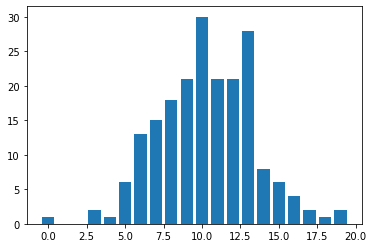

In [61]:
samp = torch.distributions.Normal(0, 10)
data = samp.sample((200,))
bins = 20
hist = torch.histc(data, bins)
plt.bar(range(bins), hist)